In [1]:
# Ravi Kiran Mahoorkar
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
#dft=train dataset
dft=pd.read_csv('Titanic_train.csv')
#dfp=test dataset(prediction dataset)
dfp=pd.read_csv('Titanic_test.csv')

In [3]:
# train dataset
print(dft.head())
#test dataset
print(dfp.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [4]:
#information of dataset
#traint set
print(dft.info())
#test set
print(dfp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
#description of dataset
#train set
print(dft.describe())
#test set
print(dfp.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [6]:
#Checking for null values
#train set
dft.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
#filling null values
#for train set
dft['Age'].fillna(dft['Age'].median(),inplace=True)             #numerical column
dft['Embarked'].fillna(dft['Embarked'].mode()[0],inplace=True)  #categorical column

In [8]:
#Checking for null values
#test set
dfp.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [9]:
#fill na in test set
dfp['Age'].fillna(dfp['Age'].median(),inplace=True)             #numerical column
dfp['Fare'].fillna(dfp['Fare'].median(),inplace=True)             #numerical column

In [10]:
# Create a binary feature indicating the presence of Cabin information
#for train dataset
dft['Cabin_Missing'] = dft['Cabin'].notnull().astype(int)
#for test dataset
dfp['Cabin_Missing'] = dfp['Cabin'].notnull().astype(int)

In [11]:
# Apply the condition to create the new column 'Age'
#for train dataset
# Male = 0 , Female = 1
dft['Sex'] = np.where(dft['Sex'] == 'male', 0, 1)
#for test dataset
dfp['Sex'] = np.where(dfp['Sex'] == 'male', 0, 1)

In [12]:
#Checking for duplicates
print(dft.duplicated().sum())
print(dfp.duplicated().sum())

0
0


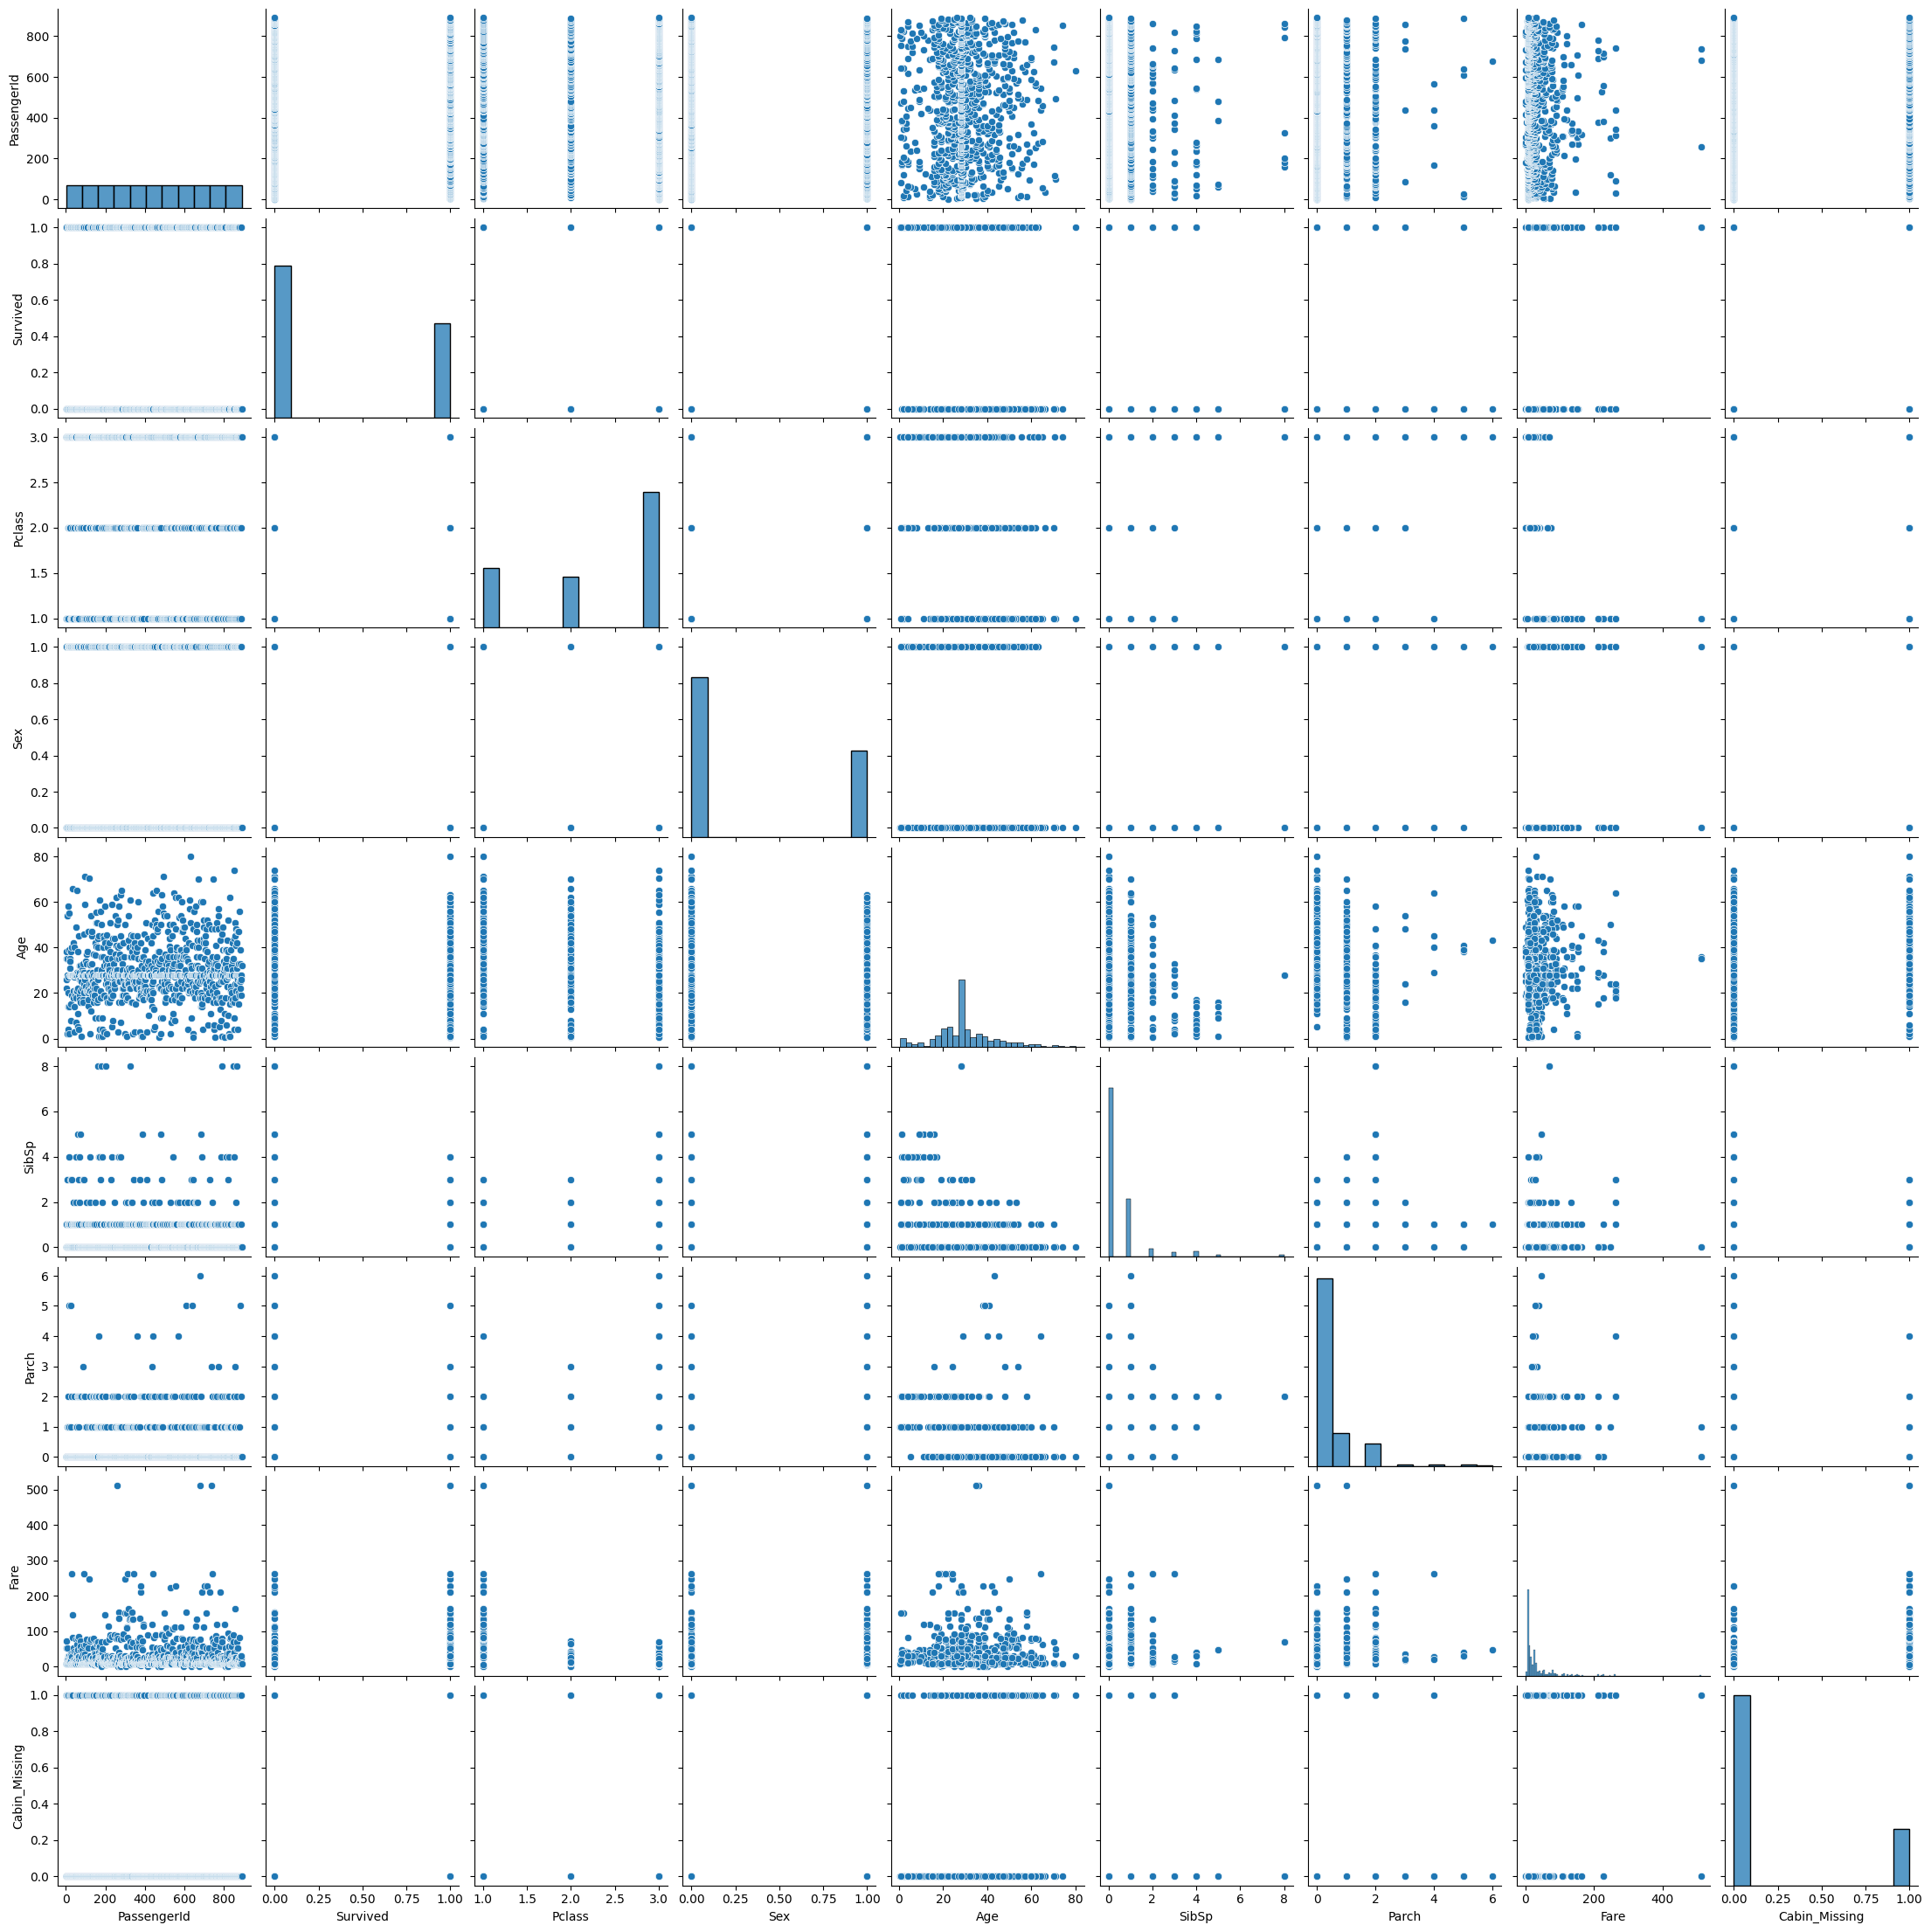

In [13]:
#creating pair plot
import matplotlib.pyplot as plt
sns.pairplot(dft)
plt.show()

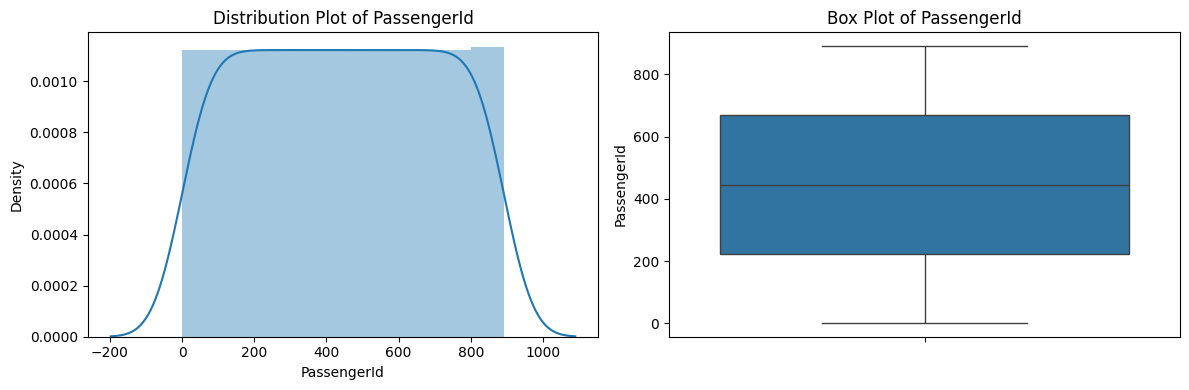

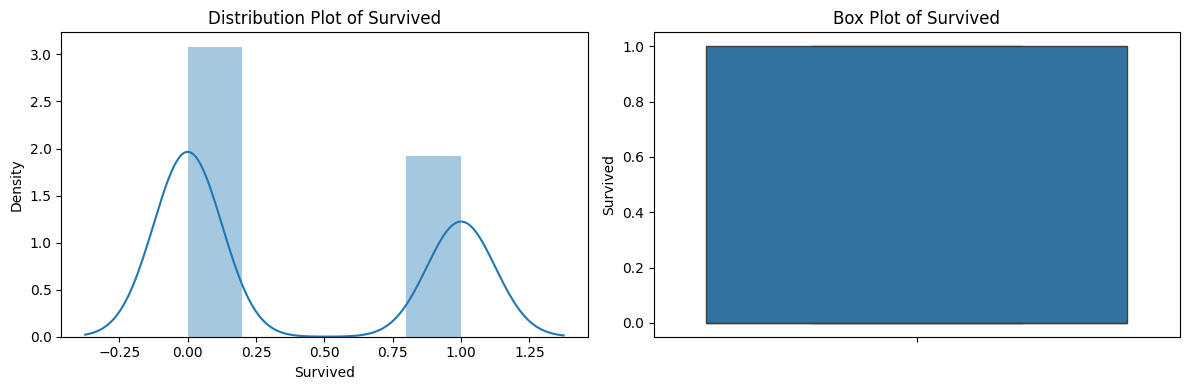

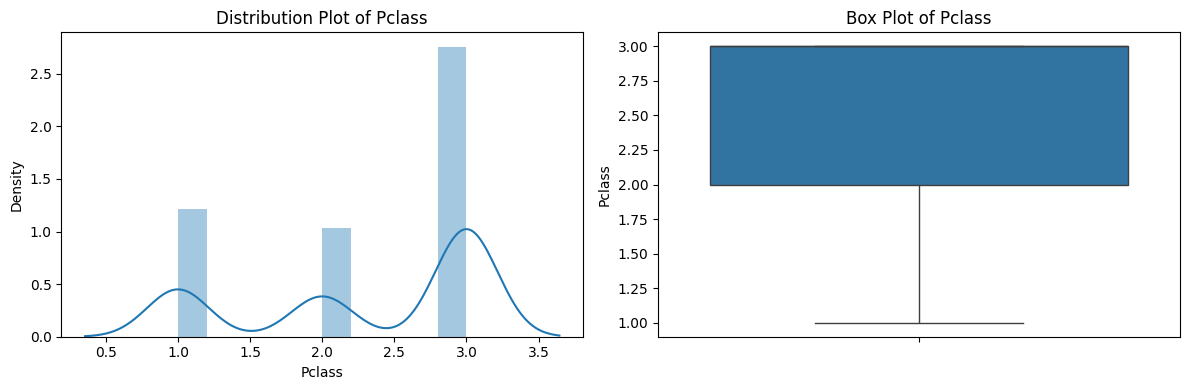

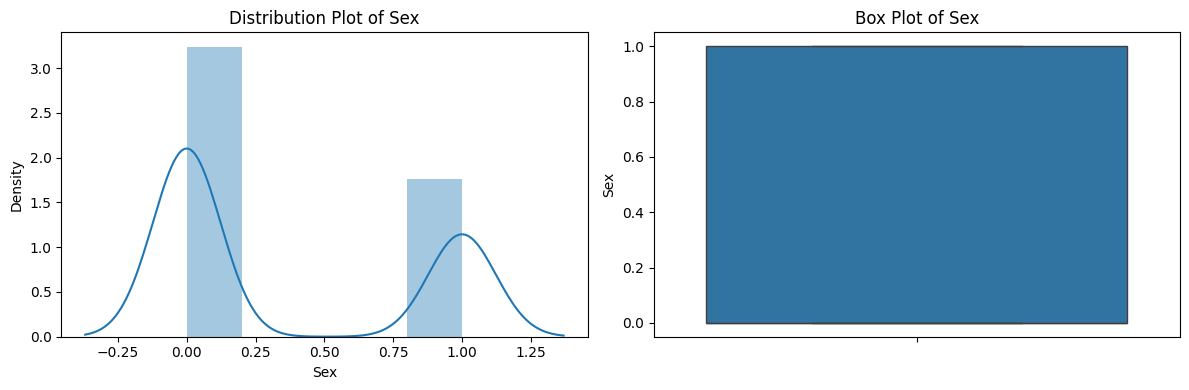

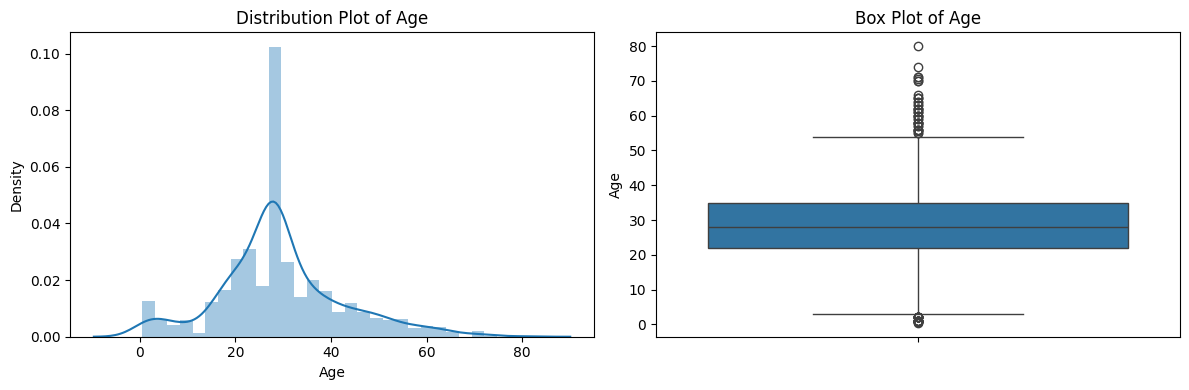

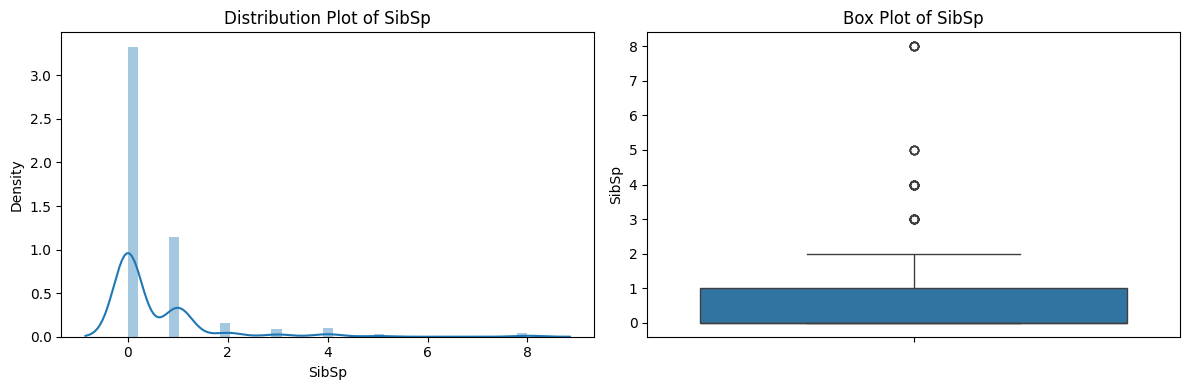

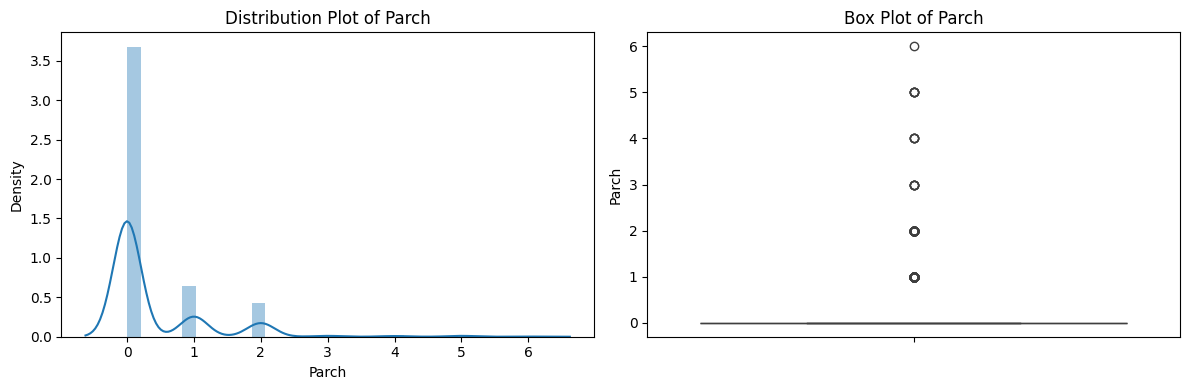

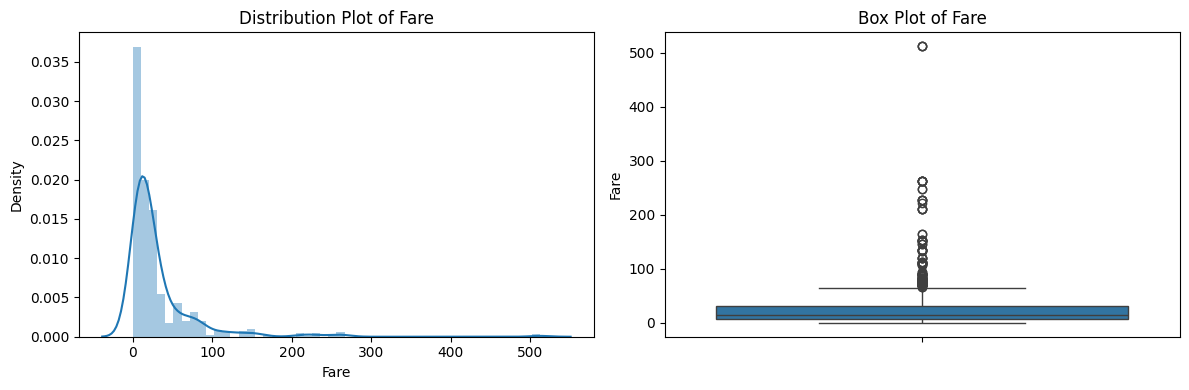

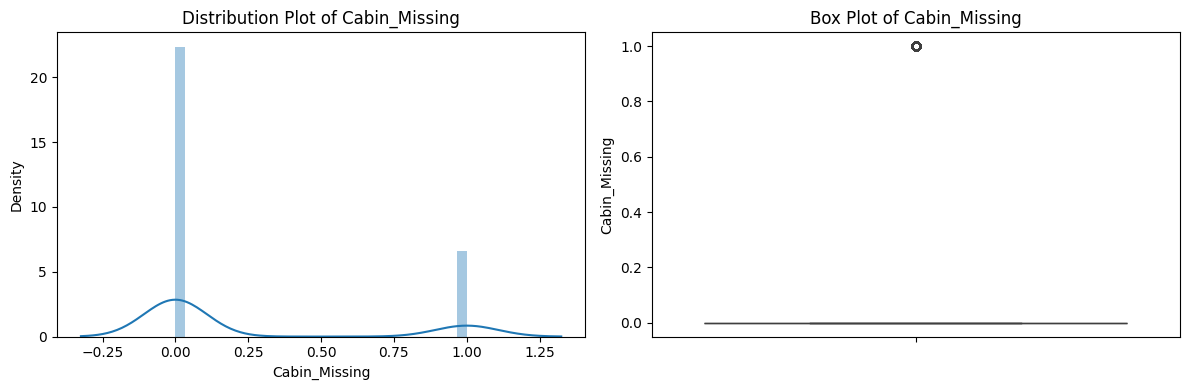

In [14]:
#  create distplot and box plot of all columns

for col in dft.columns:
    if pd.api.types.is_numeric_dtype(dft[col]):  # Check if the column is numeric
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.distplot(dft[col])
        plt.title(f'Distribution Plot of {col}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=dft[col])
        plt.title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

In [15]:
#non useful data
#for train dataset
dft1=dft.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
#for test dataset
dfp1=dfp.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [16]:
# Rename the 'Cabin_Missing' column to 'cabin'
dft1.rename(columns={'Cabin_Missing': 'cabin'}, inplace=True)
dfp1.rename(columns={'Cabin_Missing': 'cabin'}, inplace=True)

In [17]:
# Create dummy variables for 'Embarked' column and convert to integers
dft1 = pd.get_dummies(dft1, columns=['Embarked'], drop_first=True).astype(int)
dfp1 = pd.get_dummies(dfp1, columns=['Embarked'], drop_first=True).astype(int)

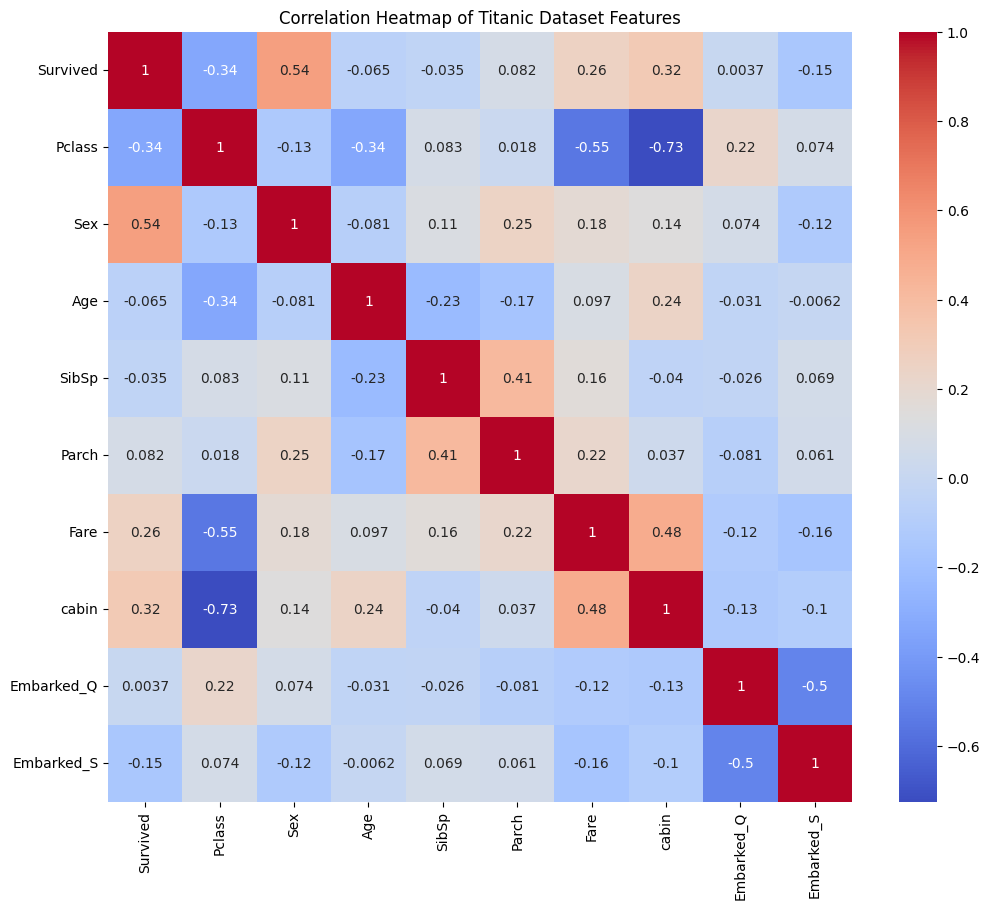

In [18]:
# correlation heatmap DataFrame after preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(dft1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()

# **Model building**

# XGBoost

In [19]:
!pip install --upgrade scikit-learn==1.2.2 xgboost -q

In [20]:
#specifying dependent and independent variables
X=dft1.iloc[:,1:10]  #independent
Y=dft1.iloc[:,0]     #dependent

In [21]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [22]:
# fit model  training data
model = XGBClassifier(max_depth =6, n_estimators=500, learning_rate=0.50,gamma=0.5, objective='binary:logistic')
model.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
# make predictions for data
y_pred = model.predict(X)
predictions = [round(value) for value in y_pred]

In [24]:
#predictions on test dataset
y_pred1 = model.predict(dfp1)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
#evaluation metrics
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       549
           1       0.90      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891



Cross-validation and Hyperparameter tuning to optimize model performance.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Define the KFold cross-validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
scores = cross_val_score(model, X, Y, cv=kfold)

In [27]:
# Print the results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores: [0.81005587 0.82022472 0.87078652 0.80337079 0.84269663]
Mean Accuracy: 0.83
Standard Deviation: 0.02


# **LGBoost**

In [28]:
#specifying dependent and independent variables
X=dft1.iloc[:,1:10]  #independent
Y=dft1.iloc[:,0]     #dependent

In [29]:
import lightgbm as lgb
# Define the LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=200, learning_rate=0.06, num_leaves=31,max_depth=4, objective='multiclass', num_class=3)

In [30]:
# Fit the model
lgb_model.fit(X, Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] Start training from score -0.484246
[LightGBM] [Info] Start training from score -0.957534
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier(learning_rate=0.06, max_depth=4, n_estimators=200, num_class=3,
               objective='multiclass')

In [31]:
#Prediction
y_predl=lgb_model.predict(X)
predictions = [round(value) for value in y_predl]

In [32]:
#evaluation metrics
print(classification_report(Y,y_predl))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.91      0.82      0.86       342

    accuracy                           0.90       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Define the KFold cross-validator
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Evaluate the model using cross-validation
scores = cross_val_score(lgb_model, X, Y, cv=kfold)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] Start training from score -0.472253
[LightGBM] [Info] Start training from score -0.977091
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [34]:
# Print the results
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores: [0.83798883 0.80898876 0.85955056 0.80898876 0.85393258]
Mean Accuracy: 0.83
Standard Deviation: 0.02


# **Summary**

In [35]:
# Model Comparison Summary

print("\nModel Comparison Summary:")

print("\nXGBoost:")
print(f"  Mean Accuracy: {scores.mean():.2f}")
print(f"  Standard Deviation: {scores.std():.2f}")
print(classification_report(Y,y_pred))


print("\nLightGBM:")
print(f"  Mean Accuracy: {scores.mean():.2f}") # Note: scores variable is overwritten
print(f"  Standard Deviation: {scores.std():.2f}") # Note: scores variable is overwritten
print(classification_report(Y,y_predl))



Model Comparison Summary:

XGBoost:
  Mean Accuracy: 0.83
  Standard Deviation: 0.02
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       549
           1       0.90      0.81      0.85       342

    accuracy                           0.89       891
   macro avg       0.89      0.88      0.88       891
weighted avg       0.89      0.89      0.89       891


LightGBM:
  Mean Accuracy: 0.83
  Standard Deviation: 0.02
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.91      0.82      0.86       342

    accuracy                           0.90       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.90      0.90       891



In [36]:
# A brief report summarizing the comparative analysis results and practical implications.
'''
1. Both XGBoost and LightGBM models demonstrated strong performance in predicting passenger survival on the Titanic,
achieving comparable mean accuracy scores.

2.  XGBoost exhibited a slightly higher standard deviation in cross-validation accuracy,
suggesting potentially higher variability in performance across different data folds compared to LightGBM.

3. The classification reports for both models reveal high precision, recall, and F1-scores,
indicating accurate classification of both survived and non-survived passengers.

4.  These findings suggest that both XGBoost and LightGBM are suitable for this prediction task.
The choice between the two may depend on specific priorities, with LightGBM potentially offering more
stable performance given its lower standard deviation in cross-validation.
'''

'\n1. Both XGBoost and LightGBM models demonstrated strong performance in predicting passenger survival on the Titanic, \nachieving comparable mean accuracy scores.\n\n2.  XGBoost exhibited a slightly higher standard deviation in cross-validation accuracy, \nsuggesting potentially higher variability in performance across different data folds compared to LightGBM.\n\n3. The classification reports for both models reveal high precision, recall, and F1-scores, \nindicating accurate classification of both survived and non-survived passengers.  \n\n4.  These findings suggest that both XGBoost and LightGBM are suitable for this prediction task. \nThe choice between the two may depend on specific priorities, with LightGBM potentially offering more \nstable performance given its lower standard deviation in cross-validation.\n'